In [ ]:
# Assignment 3. Create the multiple regression model for the dataset of house. This will be used the predict the price
# of the home based on at least five factors. Decide the dependent and independent variables.
# 1. Find accuracy score
# 2. Convert train (80%) and Test (20%) data to test the accuracy.
# 3. Perform the prediction
# 4. Find mean squared error.
# 5. Print values of coefficients and intercept
# 6. Plot the linear model (at least four plots on single plane

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import zscore


In [6]:
# Load dataset
data = pd.read_csv("Housing - Housing.csv")  # Adjust path
data.columns = data.columns.str.strip()

# Convert binary categorical variables
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
data[binary_cols] = data[binary_cols].replace({'yes': 1, 'no': 0})

# One-hot encode 'furnishingstatus'
data = pd.get_dummies(data, columns=['furnishingstatus'], drop_first=True)

# Remove outliers
data = data[(np.abs(zscore(data.select_dtypes(include=[np.number]))) < 3).all(axis=1)]


In [7]:
# Define X and y
X = data.drop(columns=['price'])
y = np.log1p(data['price'])  # log(1 + price)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature selection using RFE
base_model = LinearRegression()
rfe = RFE(base_model, n_features_to_select=10)
X_train_selected = rfe.fit_transform(X_train_scaled, y_train)
X_test_selected = rfe.transform(X_test_scaled)


In [9]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}

for name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"{name}:")
    print("  Mean Absolute Error (MAE):", mae)
    print("  Root Mean Squared Error (RMSE):", rmse)
    print("  Mean Squared Error (MSE):", mse)
    print("  R-squared (R2 Score):", r2)
    print("  Coefficients:", model.coef_)
    print("  Intercept:", model.intercept_)
    print("-" * 50)


Linear Regression:
  Mean Absolute Error (MAE): 0.17443304130091664
  Root Mean Squared Error (RMSE): 0.21999930194879713
  Mean Squared Error (MSE): 0.04839969285795801
  R-squared (R2 Score): 0.6869028360980141
  Coefficients: [ 0.09233453  0.06457406  0.08785407  0.02952799  0.0244004   0.0412669
  0.07849506  0.02531549  0.05107029 -0.0591271 ]
  Intercept: 15.279113316725946
--------------------------------------------------
Ridge Regression:
  Mean Absolute Error (MAE): 0.1744505071732555
  Root Mean Squared Error (RMSE): 0.22007058735189827
  Mean Squared Error (MSE): 0.04843106341740949
  R-squared (R2 Score): 0.6866999002400717
  Coefficients: [ 0.09216441  0.06454313  0.08767265  0.02955353  0.02445655  0.04115597
  0.07840665  0.02535408  0.05101346 -0.0590422 ]
  Intercept: 15.279113316725946
--------------------------------------------------
Lasso Regression:
  Mean Absolute Error (MAE): 0.2583416651286193
  Root Mean Squared Error (RMSE): 0.3233854900158352
  Mean Squared

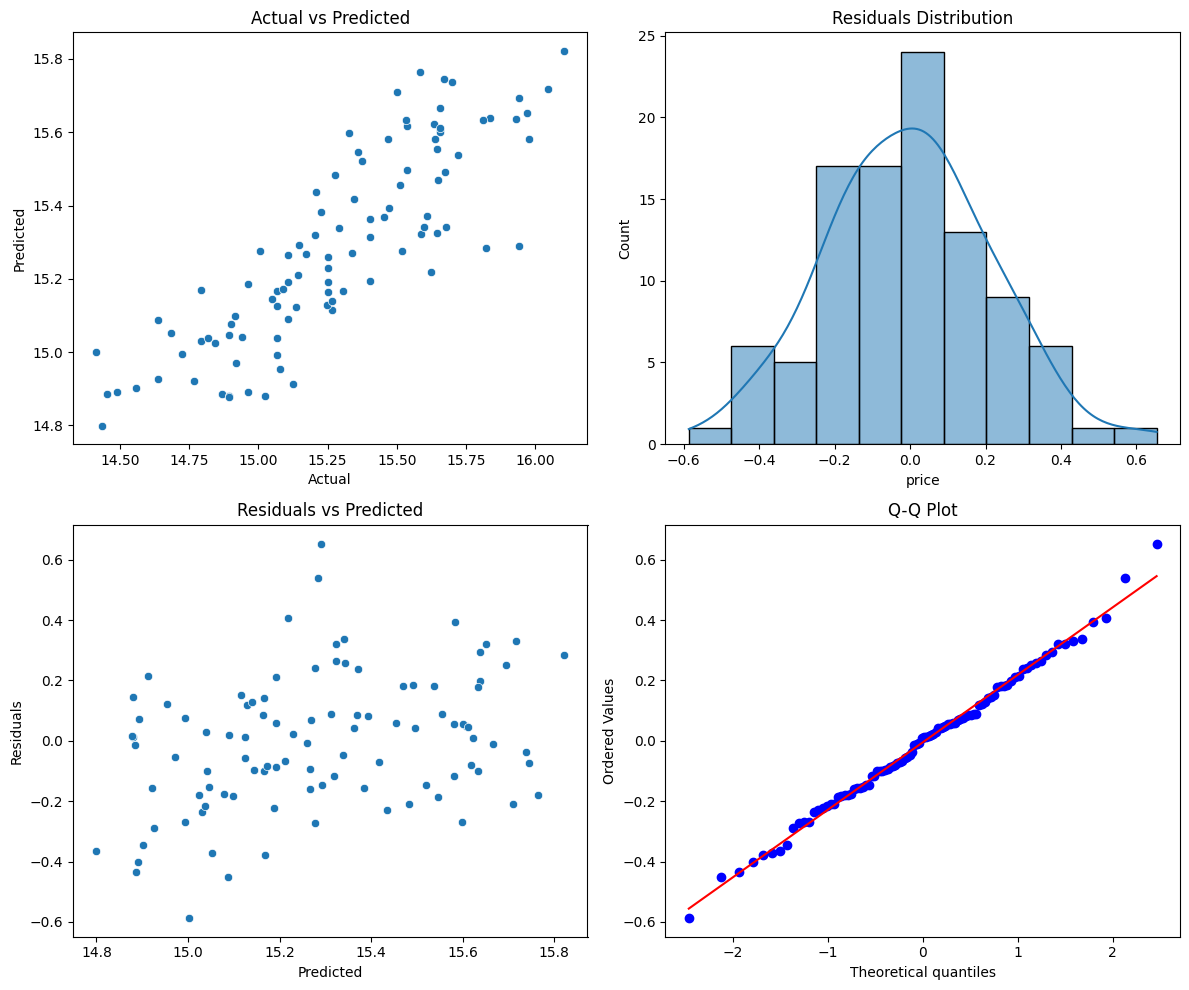

In [10]:
# Choose the best performing model (example: Linear Regression)
final_model = LinearRegression()
final_model.fit(X_train_selected, y_train)
y_pred = final_model.predict(X_test_selected)

# Create 2x2 plot grid
plt.figure(figsize=(12, 10))

# Plot 1: Actual vs Predicted
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

# Plot 2: Residuals
plt.subplot(2, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")

# Plot 3: Predicted vs Residuals
plt.subplot(2, 2, 3)
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")

# Plot 4: Q-Q Plot
from scipy import stats
plt.subplot(2, 2, 4)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")

plt.tight_layout()
plt.show()
